In [4]:
import sys

sys.path.append("../handybeam_core_repo")
sys.path.append("../handybeam_visualize_repo")

In [5]:
## Imports

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import handybeam
import handybeam.world


import handybeam.tx_array_library
import handybeam.tx_array
import handybeam.visualise
import handybeam.samplers.rectilinear_sampler as rect_sampler
from handybeam.solver import Solver

import handybeam_visualize.basic
from handybeam_visualize.basic import visualise_flat_tx_array

In [9]:
world = handybeam.world.World(frequency = 40000, sound_velocity = 343)

In [10]:
world.tx_array = handybeam.tx_array_library.rectilinear(parent = world)

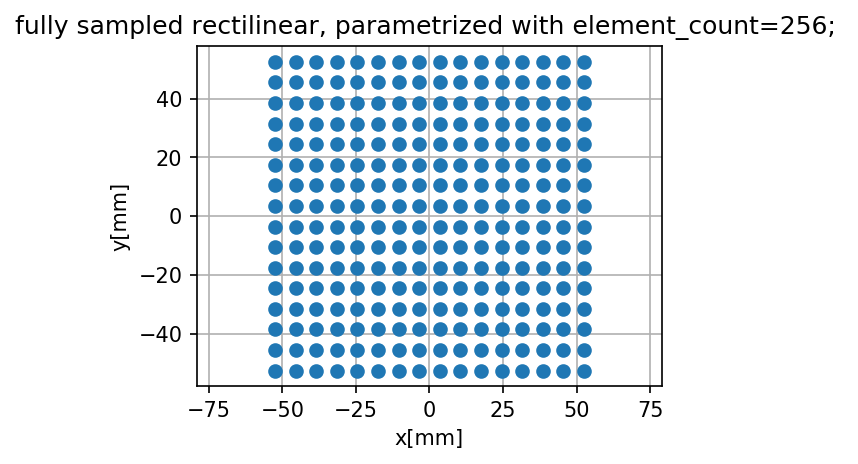

{'hf': <matplotlib.figure.Figure at 0x28864bab208>,
 'ha': <matplotlib.axes._subplots.AxesSubplot at 0x2886e443630>,
 'hp': [<matplotlib.lines.Line2D at 0x288714c6550>]}

In [11]:
visualise_flat_tx_array(world,figsize=[4,3])

Text(0.5,1,'fully sampled rectilinear, parametrized with element_count=256; ')

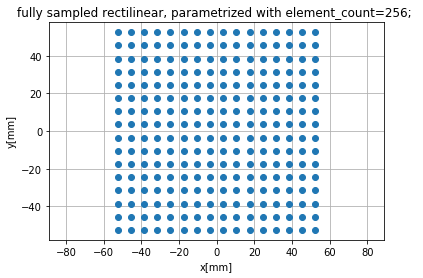

In [12]:
#
hf=plt.figure()
ha=plt.axes()
hp=plt.plot(world.tx_array.tx_array_element_descriptor[:, 0] * 1e3,
                       world.tx_array.tx_array_element_descriptor[:, 1] * 1e3, 'o')
ha.grid(True)
ha.axis('equal')
ha.set_xlabel('x[mm]')
ha.set_ylabel('y[mm]')
ha.set_title(world.tx_array.name)

In [6]:
import importlib
import handybeam.cl_system
importlib.reload(handybeam.cl_system)
handybeam.cl_system.print_all_info_of_device(0,0)

AttributeError: module 'handybeam.cl_system' has no attribute 'print_all_info_of_device'

In [8]:
dir(handybeam.cl_system)

['OpenCLSystem',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cl',
 'cl_config_file_name',
 'configparser',
 'handybeam',
 'np',
 'os',
 'print_cl_platforms',
 'select_cl_platform']